### importing tools

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
# % matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0


# Project: Investigate a Dataset - [noshowappointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 


### Question(s) for Analysis
> **What is the appointment show-up vs no show-up rate?**

> **How the age of the patients affects the show-up?**

> **How Scholarship affects the show-up?**

> **How receiving SMS affects the patients show-up?**

> **How Gender of the patient affects his/her show-up?**

> **How the weekday affect the show-up?**


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Dataset Description

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.head(-5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [13]:
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [17]:
df[df["Age"] > 100].count()


PatientId         7
AppointmentID     7
Gender            7
ScheduledDay      7
AppointmentDay    7
Age               7
Neighbourhood     7
Scholarship       7
Hipertension      7
Diabetes          7
Alcoholism        7
Handcap           7
SMS_received      7
No-show           7
dtype: int64

In [19]:
df[df["Age"] < 0].count()

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

In [21]:
df['AppointmentDay'].head(5)

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [23]:
df['ScheduledDay'].head(5)

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

In [25]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

we need to change (scheduled day and appointment day) from object to date and time type also we need to amend the ages as we see min ages 0 and some rows shows a not logic ages  (> 100 , < 0)


### Data Cleaning
 

In [27]:
## transfer negative Age to almost mean age (37) 

df.loc[df['Age'] <0, 'Age'] = 37


In [29]:
## inspect
df[df["Age"] < 0].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [31]:
## transfer Ages > 100 to almost mean age (37) 
df.loc[df['Age'] > 100, 'Age'] = 37

In [33]:
## inspect
df[df["Age"] > 100].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(f"{df['ScheduledDay'].head()}\n")

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(f"\n{df['AppointmentDay'].head()}")

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]


0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


##### clear unnecessary data

In [ ]:
df.drop(['PatientId','AppointmentID'],axis = 1, inplace = True)

##### Drop if scheduled date > appointment date

In [48]:
(df['scheduledday'].dt.date > df['appointmentday'].dt.date).sum()

5

In [50]:
idxs = df[(df['scheduledday'].dt.date > df['appointmentday'].dt.date)].index
df.drop(idxs, axis = 0, inplace = True)

In [52]:
(df['scheduledday'].dt.date > df['appointmentday'].dt.date).sum()

0

##### Change headers to be lower and readable

In [59]:
df.rename(columns= lambda x: x.lower().replace('-','_'),inplace =True )
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

##### Make a separate data frame for show and no show

In [61]:
df["no_show"].value_counts()

No     88208
Yes    22314
Name: no_show, dtype: int64

In [63]:
# Make the show DataFrame
df_show = df[df['no_show'] == 'No'].copy()

#drop the no_show column
df_show.drop('no_show',axis = 1, inplace =True)
df_show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0


In [65]:
# Make the no_show DataFrame
df_noshow = df[df['no_show'] == 'Yes'].copy()

#drop the no_show column
df_noshow.drop('no_show',axis = 1, inplace =True)
df_noshow.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0
11,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1
17,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0
20,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0


In [ ]:
df.no_show[df['no_show'] == 'Yes'] = '1'
df.no_show[df['no_show'] == 'No'] = '0'
df['no_show'] = pd.to_numeric(df['no_show'])

In [93]:
showed = df['no_show'] == 0
not_showed = df['no_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

In [95]:
df['showed'].value_counts()

True     88208
False    22314
Name: showed, dtype: int64

In [80]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,showed,not_showed
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


<a id='eda'></a>
## Exploratory Data Analysis

###  (Percentages of appointment)

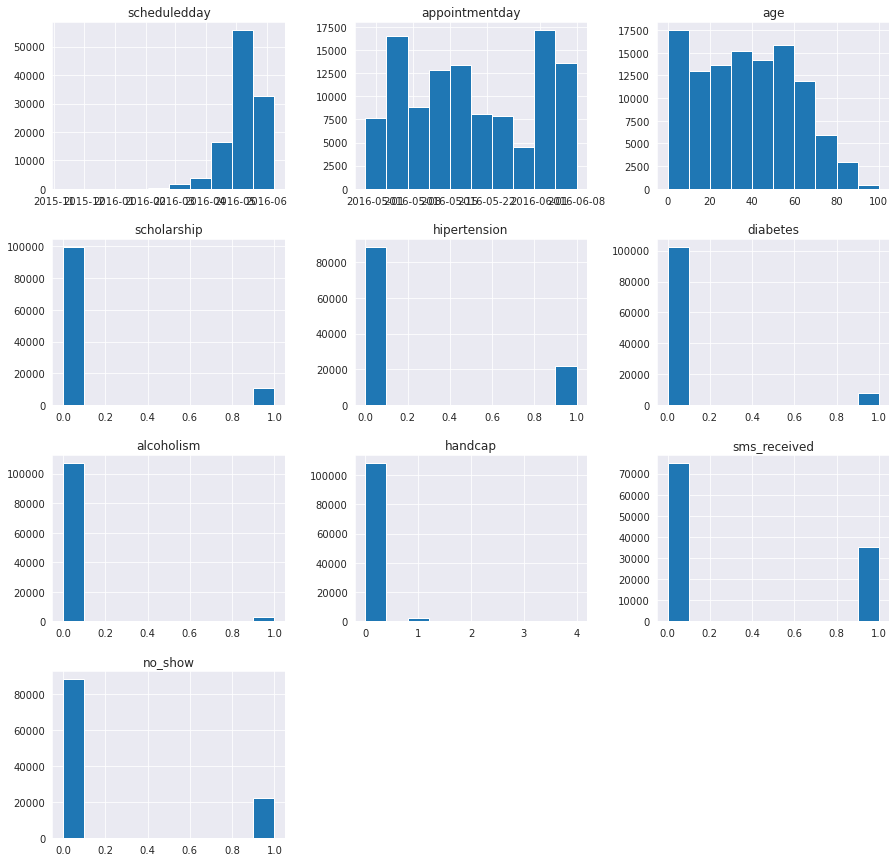

In [89]:
df.hist(figsize = (15,15));

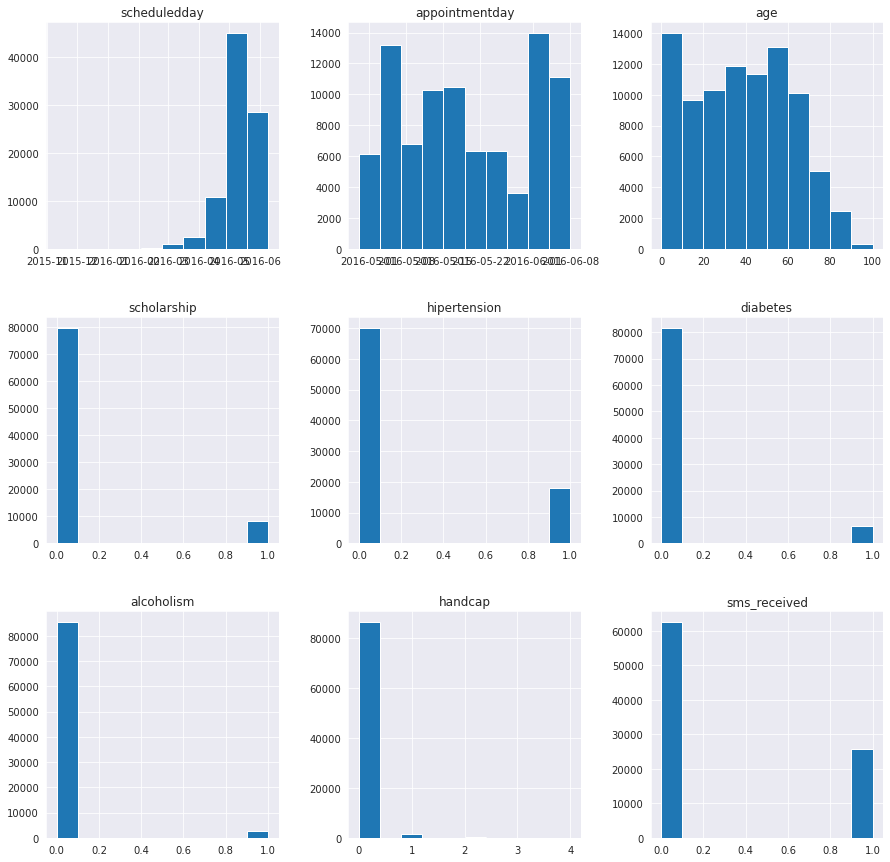

In [151]:
df_show.hist(figsize=(15,15));

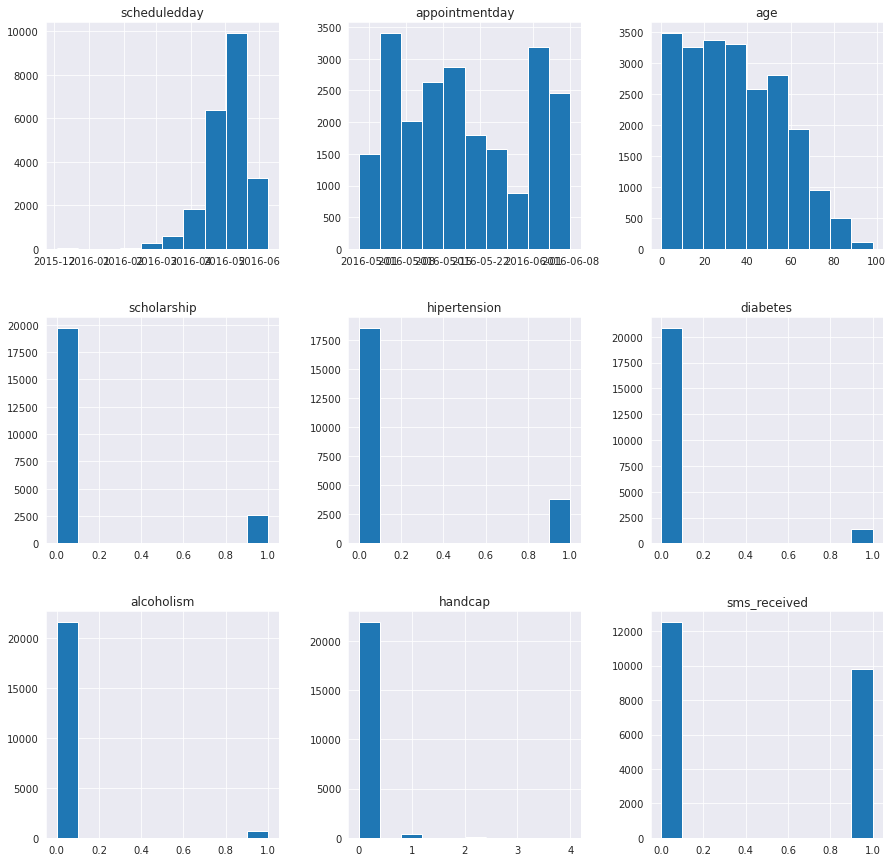

In [152]:
df_noshow.hist(figsize = (15,15));

##### What is the appointment show-up vs no show-up rate?

79.81035449955665


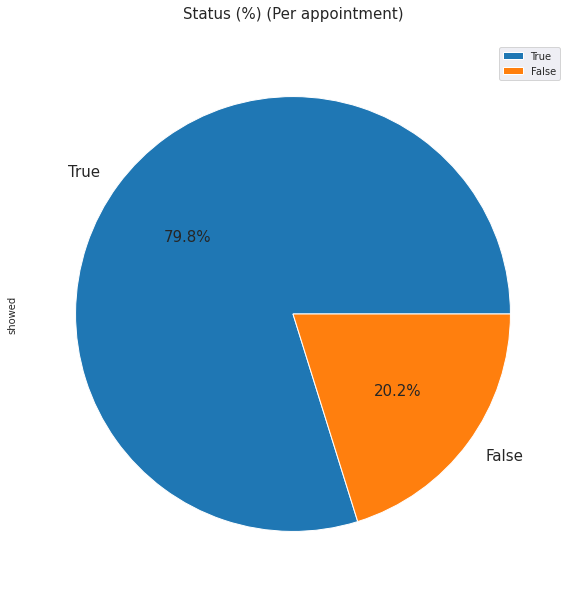

In [91]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
allP = df['showed'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 15);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

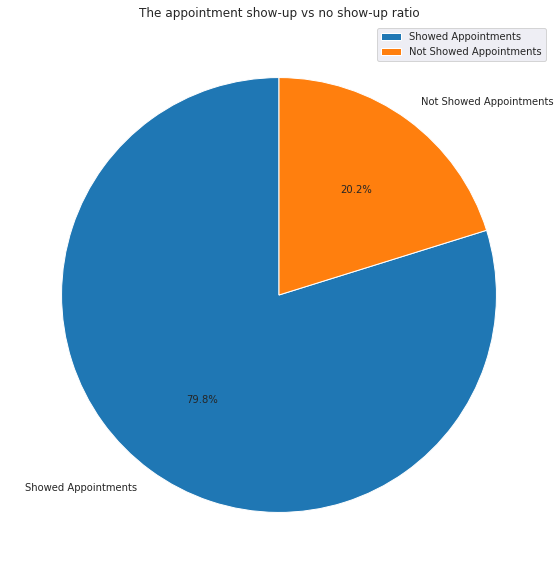

In [84]:
plt.figure(figsize =(10,10))
plt.pie([len(df_show),len(df_noshow)],labels =['Showed Appointments','Not Showed Appointments'],autopct='%1.1f%%',startangle=90)
plt.title('The appointment show-up vs no show-up ratio')
plt.legend();

it shoes that almost 80% of patients is showing up

##### How the age of the patients affects the show-up?

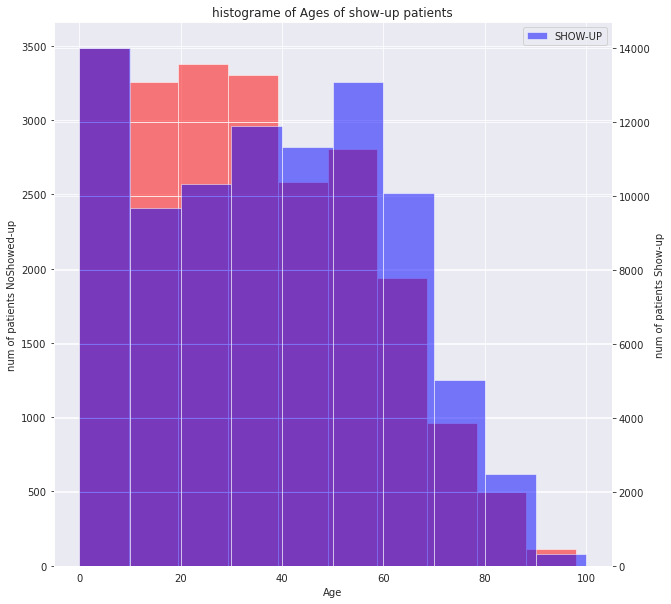

In [115]:
#plotting Histograms of patients ages (show-up, no show-up)

plt.figure(figsize =(10,10))
#hist of Ages of show-up patients 
plt.hist(df_noshow['age'],color ='r',alpha = 0.5,label ='NO SHOW-UP')
plt.ylabel('num of patients NoShowed-up')
plt.xlabel('Age')

#hist of Ages of no show-up patients
plt.twinx()
plt.hist(df_show['age'],color ='b',alpha =0.5,label ='SHOW-UP')
plt.title('histograme of Ages of show-up patients')
plt.ylabel('num of patients Show-up')
plt.legend();

Separately

Text(0.5, 0, 'Age')

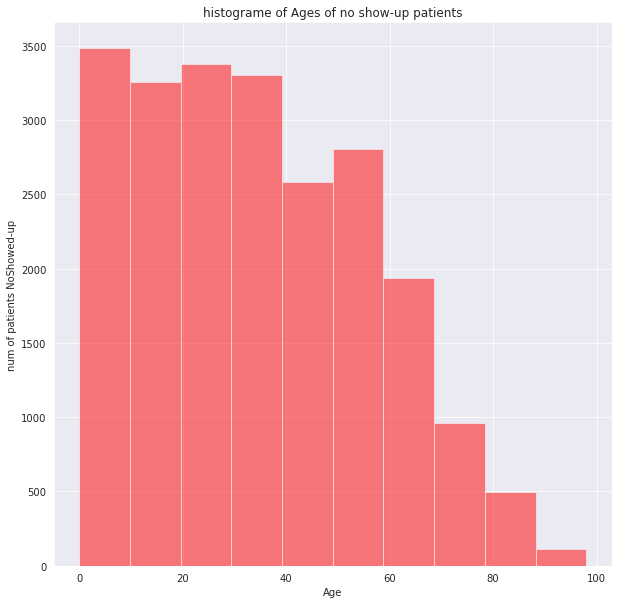

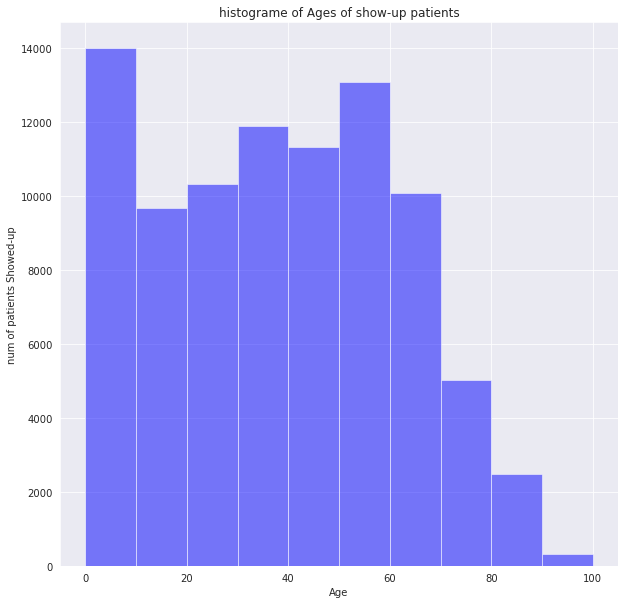

In [131]:
plt.figure(figsize =(10,10))
plt.hist(df_noshow['age'],color ='r',alpha = 0.5)
plt.title('histograme of Ages of no show-up patients')
plt.ylabel('num of patients NoShowed-up')
plt.xlabel('Age')

plt.figure(figsize =(10,10))
plt.hist(df_show['age'],color ='b',alpha = 0.5)
plt.title('histograme of Ages of show-up patients')
plt.ylabel('num of patients Showed-up')
plt.xlabel('Age')


the probability of showing up increases in ages between (40 to 90) otherwise the probability of non showing up is higher 

### making an histogram to see the realtion between the (age,alcoholic people, SMS recievers, Gender, Scholarship) and the people who came to thier appointment

##### How Scholarship affects the show-up?

In [120]:

scholarship_show = df_show['scholarship'].sum()
scholarship_noshow = df_noshow['scholarship'].sum()

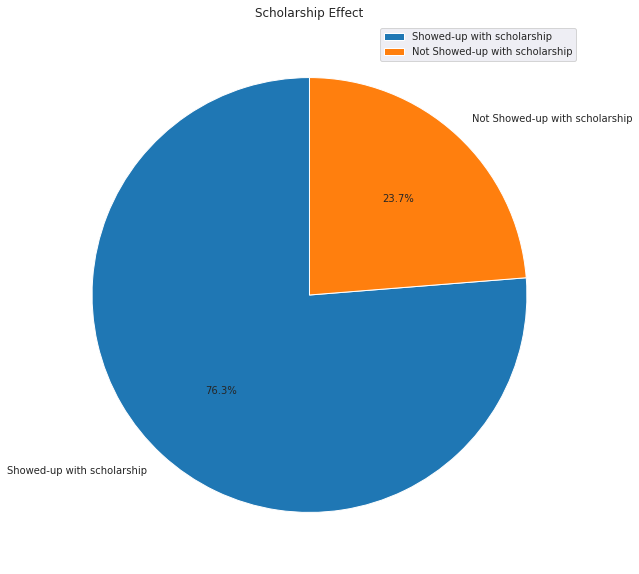

In [122]:
plt.figure(figsize =(10,10))
plt.pie([scholarship_show,scholarship_noshow],labels =['Showed-up with scholarship','Not Showed-up with scholarship'],autopct='%1.1f%%',startangle=90)
plt.title('Scholarship Effect')
plt.legend();

it shows that when the patient is scholarship the probability of showing up increase 

##### How receiving SMS affects the patients show-up?

In [124]:
sms_show = df_show['sms_received'].sum() 
sms_noshow = df_noshow['sms_received'].sum()

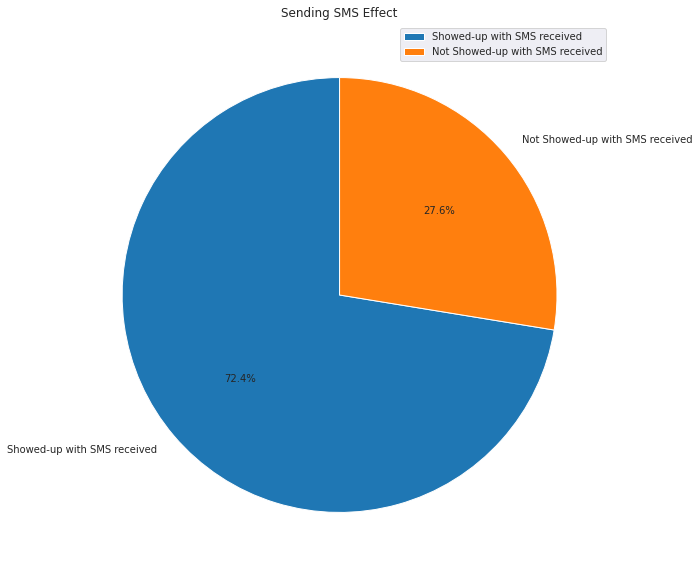

In [126]:
plt.figure(figsize =(10,10))
plt.pie([sms_show,sms_noshow],labels =['Showed-up with SMS received','Not Showed-up with SMS received'],autopct='%1.1f%%',startangle=90)
plt.title('Sending SMS Effect')
plt.legend();

also when patient received a SMS it increase the probability of showing up

##### How Gender of the patient affects his/her show-up?

In [138]:
gender = df['gender'].value_counts()
gender_show = df_show['gender'].value_counts()
gender_noshow = df_noshow['gender'].value_counts()

#percentages of Males 
M_percentage_show =  gender_show.loc['M']/gender.loc['M']  
M_percentage_noshow = gender_noshow.loc['M']/gender.loc['M']  

#percentages of Females
F_percentage_show =  gender_show.loc['F']/gender.loc['F'] 
F_percentage_noshow = gender_noshow.loc['F']/gender.loc['F']

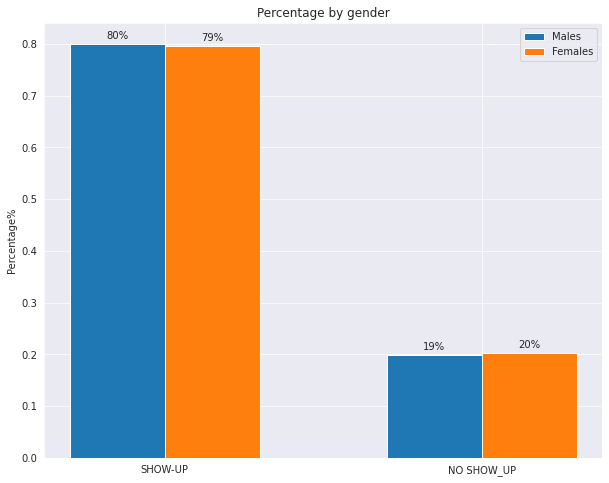

In [140]:
#Group bar plot for gender feature

labels = ['SHOW-UP','NO SHOW_UP']
M = [M_percentage_show,M_percentage_noshow]
F = [F_percentage_show,F_percentage_noshow]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(x - width/2, M, width, label='Males')
rects2 = ax.bar(x + width/2, F, width, label='Females')

ax.set_ylabel('Percentage%')
ax.set_title('Percentage by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    #Attach a percentage above each bar in rects
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(int(height*100)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.show()

it seams no such a difference between them at the behavior

##### How the weekday affect the show-up?

In [134]:
df_show['appointmentday'].dt.day_name().value_counts()

Wednesday    20774
Tuesday      20488
Monday       18025
Friday       14982
Thursday     13909
Saturday        30
Name: appointmentday, dtype: int64

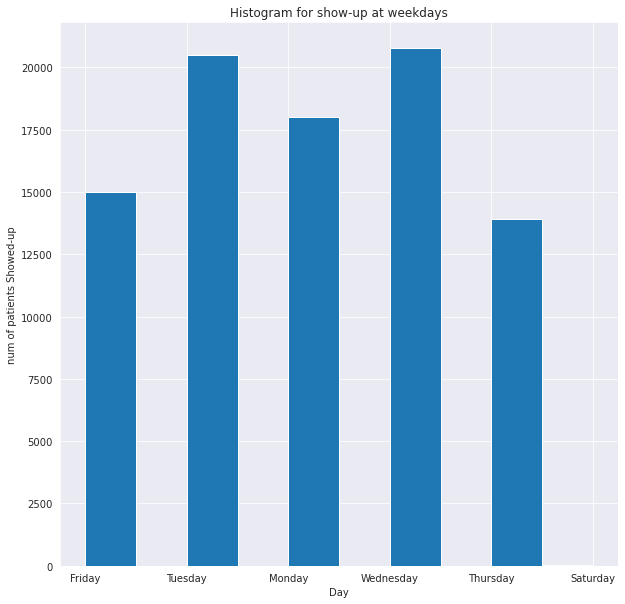

In [145]:
plt.figure(figsize =(10,10))
#hist of Ages of show-up patients 
plt.hist( df_show['appointmentday'].dt.day_name())
plt.ylabel('num of patients Showed-up')
plt.xlabel('Day')
plt.title('Histogram for show-up at weekdays');

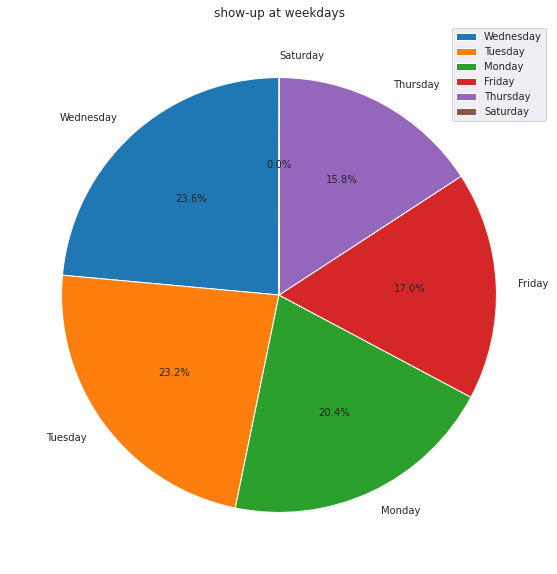

In [147]:
plt.figure(figsize =(10,10))
labels = df_show['appointmentday'].dt.day_name().value_counts().index
plt.pie(df_show['appointmentday'].dt.day_name().value_counts(), labels = labels ,autopct='%1.1f%%',startangle=90)
plt.title('show-up at weekdays')
plt.legend();

it shows that the max response in Wednesday and there is no body showed up at Saturday so it must be considered to not take any appointment at Saturday and the lowest average after comes in Thursday to be considered

<a id='conclusions'></a>
# conclusions
## the appointment show-up vs no show-up rate:
about 80% of total patiens show up in their appointments.


##### How the age of the patients affects the show-up?

We notice that generally the ages the patients who show up their appointment is greater than who didn't.
And we can also notice this in the means of ages, the mean age for patients who show up = 37.8, and for who did not = 34.3 years.

##### Scholarship effect:

The % Percentage of the patients who have a scholarship and show up is 76.3%.

##### SMS effect:

The % Percentage of the patients who received one or more SMS and show up is 72.4%.

##### Gender effect:

The meals of femeals who show up is about 80% and this percentage is close to the overall rate.

##### weekday affect:

We can notice that the day Wednsday has the most showing-up in the days of week.
The Day Thursday has very low showing-up.
The Day Saturday has zero records, So, may be they don't receive patiens that day.

In [177]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

Traceback (most recent call last):
  File "/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/nbconvert/__main__.py", line 2, in <module>
    main()
  File "/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/opt/conda/envs/anaconda-2022.05-py39/lib/python3

1